In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
folder_path = "data/Spaltbreiten"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.dat')]

data = {}

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    file_data = np.loadtxt(file_path, delimiter='\t')
    w = float(csv_file.replace('.dat', '').replace('_', '.'))
    if w < 1.0:
        data[w] = file_data

Spaltbreite: 0.4, FWHM: -5.0, Max:359.65
Spaltbreite: 0.5, FWHM: -5.0, Max:827.29
Spaltbreite: 0.6, FWHM: -7.0, Max:1182.45
Spaltbreite: 0.7, FWHM: -7.0, Max:1400.04
Spaltbreite: 0.8, FWHM: -8.0, Max:1535.6399999999999
Spaltbreite: 0.9, FWHM: -9.0, Max:1648.84


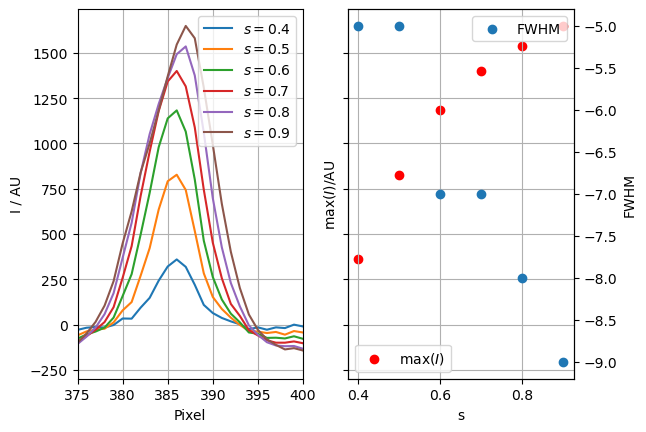

In [3]:
fig, (ax, ax2) = plt.subplots(1, 2, sharey=True)
start, end = (350, 450)
widths = []
maxs = []
fwhms =[]
ax.set(xlim=[375, 400])
for width in data:
    steps = data[width][:, 0][start:end]
    inten = data[width][:, 1][start:end]
    inten -= np.mean(inten)
    max = np.max(inten)
    max_i = np.argmax(inten)
    left = inten[:max_i]
    right = inten[max_i:]
    left_steps = steps[np.argmin(abs(left - max/2))]
    right_steps = steps[max_i + np.argmin(abs(right - max/2))]

    w =  left_steps - right_steps
    #ax.axvline(left_steps)
    #ax.axvline(right_steps)

    ax.plot(steps, inten, label=f'$s =  {width}$')
    widths.append(width)
    maxs.append(max)
    fwhms.append(w)

    print(f"Spaltbreite: {width}, FWHM: {w}, Max:{max}")
ax.grid()
ax.legend()
ax.set(xlabel="Pixel", ylabel="I / AU")
ax3 = ax2.twinx()
ax2.scatter(widths, maxs, c='r', label="$\mathrm{max}(I)$")
ax2.set(ylabel="$\mathrm{max}(I) / \mathrm{AU}$", xlabel='s')
ax3.scatter(widths, fwhms, label='FWHM')
ax3.set(ylabel="FWHM")
ax2.grid()
ax2.legend(loc=3)
ax3.legend()

fig.savefig("out/spaltbreiten")

NameError: name 'slope' is not defined